In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('titanic.csv')

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [7]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                     

# EDA

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df.duplicated().sum()

0

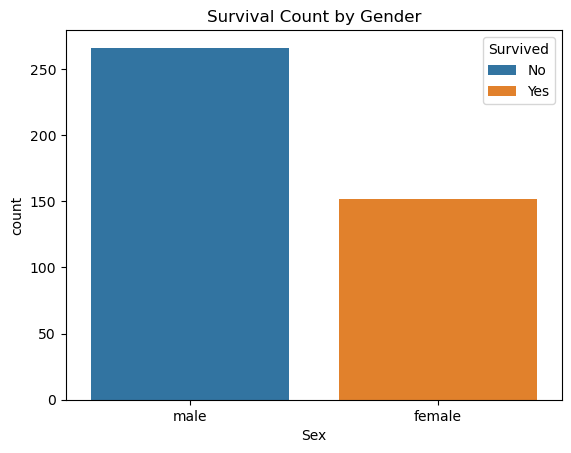

In [18]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


### That bar chart is showing:
### Left bar → more men died than survived.
### Right bar → more women survived than died.

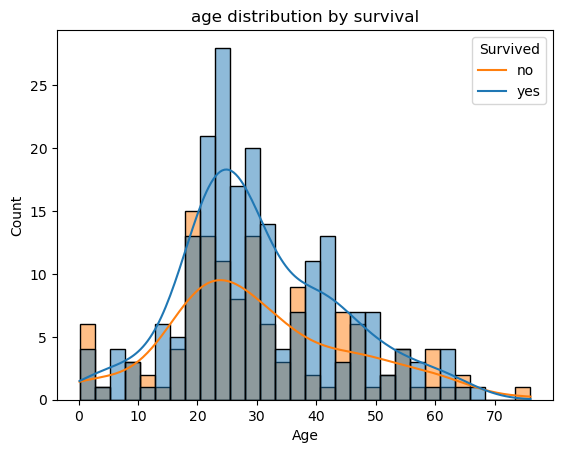

In [20]:
sns.histplot(data=df,x='Age',hue='Survived',bins=30,kde=True,)
plt.title("age distribution by survival")
plt.legend(title="Survived",labels=["no","yes"])
plt.show()

<Axes: xlabel='Pclass', ylabel='Count'>

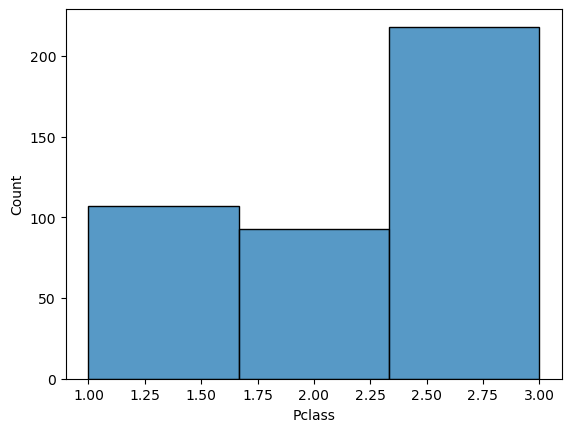

In [21]:
sns.histplot(data=df,x="Pclass",bins=3)

### more people from 3rd class present on board

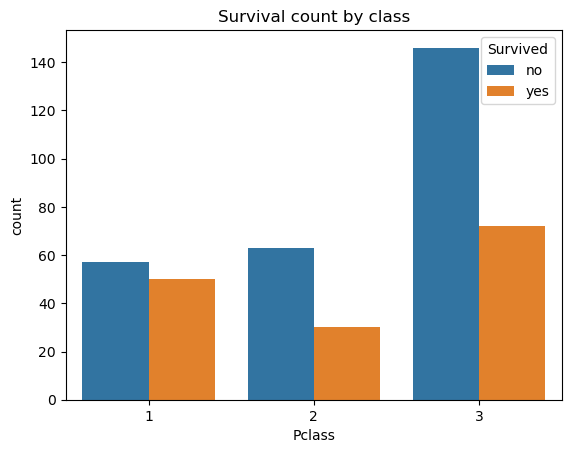

In [24]:
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.title("Survival count by class")
plt.legend(title="Survived",labels=["no","yes"])
plt.show()

<Axes: xlabel='Embarked', ylabel='Count'>

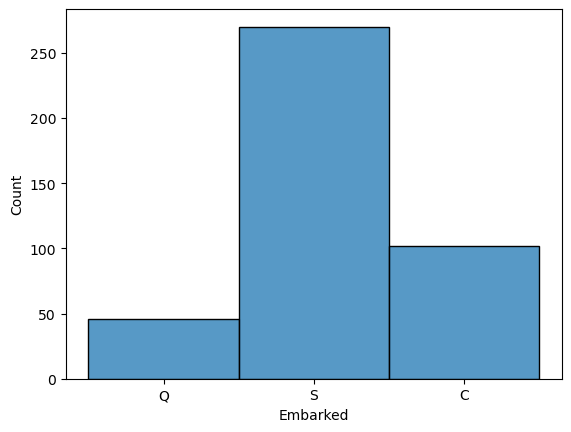

In [25]:
sns.histplot(data=df,x='Embarked')

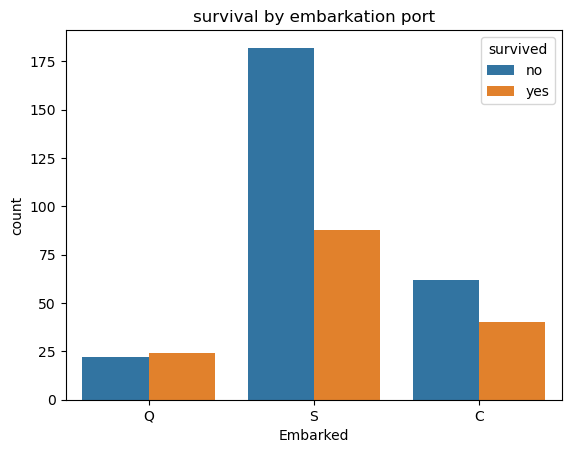

In [27]:
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.title("survival by embarkation port")
plt.legend(title="survived",labels=["no","yes"])
plt.show()

<Axes: xlabel='Pclass', ylabel='Count'>

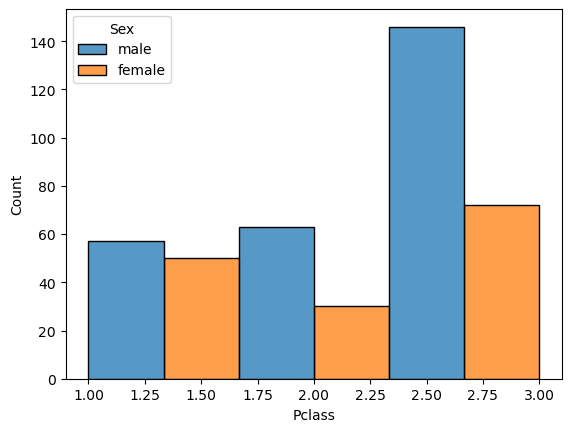

In [29]:
sns.histplot(data=df,x='Pclass',hue='Sex',bins=3,multiple='dodge')

# Data Cleaning

In [32]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


### we did not drop the fare column because It’s numerical and important. People who paid higher fares (1st class) tended to survive more. It has predictive power.
### (the ticket column was just ticket number and not price so dropped)

In [38]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))

###  filling missing Age values based on passenger class (Pclass) and gender (Sex)
### groupby(['Sex', 'Pclass']) → Creates subgroups like:
### ['Age'].transform(...) → Applies a transformation to every row in the group.
### lambda x: x.fillna(x.median()) → If Age is null, fill it with the median age of the group.

In [41]:
df['Age'].isnull().sum()

0

In [43]:
df=df.dropna(subset=['Fare'])

In [45]:
df['Fare'].isnull().sum()

0

# Encoding

In [50]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

C:\Users\alka2\AppData\Local\Temp\ipykernel_28988\2661421227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=df['Sex'].map({'male':0,'female':1})


In [52]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [54]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,NaN,34.5,0,0,7.8292,True,False
1,1,3,NaN,47.0,1,0,7.0000,False,True
2,0,2,NaN,62.0,0,0,9.6875,True,False


###  What does drop_first=True do?
### It drops the first category alphabetically (in this case, C) to avoid multicollinearity — this is known as the dummy variable trap.
### So:
### Embarked_C is dropped.
### Embarked_Q and Embarked_S are kept.

# Feature Engineering

In [58]:
df['FamSize']=df['SibSp']+df['Parch']+1  #+1 is for self 

In [60]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamSize
0,0,3,NaN,34.5,0,0,7.8292,True,False,1
1,1,3,NaN,47.0,1,0,7.0000,False,True,2
2,0,2,NaN,62.0,0,0,9.6875,True,False,1


In [62]:
df['IsAlone'] = 1  # default alone
df.loc[df['FamSize'] > 1, 'IsAlone'] = 0
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamSize,IsAlone
0,0,3,NaN,34.5,0,0,7.8292,True,False,1,1
1,1,3,NaN,47.0,1,0,7.0000,False,True,2,0
2,0,2,NaN,62.0,0,0,9.6875,True,False,1,1


### extracting title from Name is super informative:
#### Mr, Miss, Mrs → common categories
#### Master, Dr, Rev, Col → rare titles that may hint age or social status

### but since name is already dropped we will Load only the 'Name' column again and add it to existing df -

In [65]:
df['Name']=pd.read_csv('titanic.csv',usecols=['Name'])


In [67]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [69]:
df.drop('Name', axis=1, inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamSize,IsAlone,Title
0,0,3,NaN,34.5,0,0,7.8292,True,False,1,1,Mr
1,1,3,NaN,47.0,1,0,7.0000,False,True,2,0,Mrs
2,0,2,NaN,62.0,0,0,9.6875,True,False,1,1,Mr
3,0,3,NaN,27.0,0,0,8.6625,False,True,1,1,Mr
4,1,3,NaN,22.0,1,1,12.2875,False,True,3,0,Mrs


In [71]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [73]:
df['Title'].value_counts()

Title
Mr        239
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [75]:
df['Title']=df['Title'].replace(['Col','Rev','Ms','Dr','Dona'],'Rare')  #note that this will not add a new column rare but will replace titles with less count with 'rare'

In [77]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

## from df['Title'].value_counts() we can see there are few titles like Col, rev.. whose count is very less so we can group these titles as 'rare'

In [80]:
# encode the titles columns
df=pd.get_dummies(df,columns=['Title'],drop_first=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamSize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,NaN,34.5,0,0,7.8292,True,False,1,1,False,True,False,False
1,1,3,NaN,47.0,1,0,7.0000,False,True,2,0,False,False,True,False
2,0,2,NaN,62.0,0,0,9.6875,True,False,1,1,False,True,False,False


# Splittin the data

In [83]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
import numpy as np

print(np.isnan(X_train).sum())  # Should be 0
print(np.isnan(X_test).sum())   # Should be 0


333
84


### X_train has 333 missing (NaN) values
### X_test has 84 missing (NaN) values
### because of this StandardScaler is throwing warnings. It can't handle missing values on its own.

### fill the missing values with mean

In [93]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or strategy='median'

X_train = imputer.fit_transform(X_train)   # Fit only on training data
X_test = imputer.transform(X_test)         # Apply the same transformation to test data


C:\Users\alka2\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\alka2\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [106]:
lr_predict=lr.predict(X_test)

# Logistic Regression Model Evaluation

In [112]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [114]:
print("LR Accuracy: ",accuracy_score(y_test,lr_predict))
print("LR Confusion Matrix: ",confusion_matrix(y_test,lr_predict))
print("LR Classification Report: ",classification_report(y_test,lr_predict))

LR Accuracy:  0.9880952380952381
LR Confusion Matrix:  [[50  0]
 [ 1 33]]
LR Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



# Decsion Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
tree_predict=tree.predict(X_test)

# Decsion Tree Model Evaluation

In [131]:
print(" Decsion Tree accuracy: ",accuracy_score(y_test,tree_predict))
print("Decsion Tree confusion matrix: ", confusion_matrix(y_test,tree_predict))
print("Decsion Tree Classification Report: ",classification_report(y_test,tree_predict))

 Decsion Tree accuracy:  0.9880952380952381
Decsion Tree confusion matrix:  [[50  0]
 [ 1 33]]
Decsion Tree Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



# Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [142]:
forest_predict=forest.predict(X_test)

# Random Forest Classifier Model Evaluation

In [145]:
print("Random Forest Accuracy Score: ",accuracy_score(y_test,forest_predict))
print("Random Forest Confusion MAatrix: ",confusion_matrix(y_test,forest_predict))
print("Random Fores Classification Report: ",classification_report(y_test,forest_predict))

Random Forest Accuracy Score:  0.9880952380952381
Random Forest Confusion MAatrix:  [[50  0]
 [ 1 33]]
Random Fores Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

